<a href="https://colab.research.google.com/github/KiplahD/Masters/blob/main/DataVisualizationWithMatplotlibAndSeaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
      import pandas
data = pandas.read_csv('https://modcom.co.ke/data/datasets/schoolcleaned.csv',
                       parse_dates = ["bday", "enrolldate", "expgradate"])
data.head(10)

,Unnamed: 0,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,...,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime,Performance,Total
0,0,43783,1995-03-22,2014-08-04,2019-05-13,Unknown,uknown,Male,Non-Athlete,217.05,...,60.02,81.440000,In state,On Campus,Other,27.149573,7.0,1.0,Failed,222.960000
1,29,20230,1996-01-02,2014-08-04,2020-05-11,Freshmen,pre-pharma,Male,Athlete,240.33,...,65.36,76.070000,In state,On Campus,Other,27.149573,8.0,3.0,Failed,217.030000
2,30,21083,1995-12-22,2014-08-04,2020-05-11,Freshmen,uknown,Female,Non-Athlete,216.15,...,68.53,71.420000,In state,Off Campus,Car,26.000000,5.0,3.0,Failed,226.870000
3,31,21939,1995-12-12,2014-08-04,2020-05-11,Freshmen,uknown,Male,Athlete,198.27,...,61.61,79.521683,In state,Off Campus,Car,39.000000,6.0,5.0,Failed,222.231683
4,32,23017,1995-11-29,2014-08-04,2020-05-11,Freshmen,uknown,Unknown,Non-Athlete,215.16,...,65.25,72.610000,In state,Off Campus,Bike,8.000000,8.0,4.0,Failed,222.050000
5,33,23217,1995-11-26,2014-08-04,2019-05-13,Freshmen,pre med,Male,Non-Athlete,214.23,...,66.66,85.380000,In state,Off Campus,Car,31.000000,5.0,5.0,Failed,233.580000
6,34,23889,1995-11-18,2014-08-04,2019-05-13,Freshmen,communication,Male,Athlete,210.87,...,66.21,76.240000,In state,On Campus,Other,27.149573,9.0,8.0,Failed,228.860000
7,35,24985,1995-11-05,2014-08-04,2019-05-13,Freshmen,biology,Female,Non-Athlete,201.81,...,56.04,79.521683,In state,On Campus,Other,27.149573,8.0,11.0,Failed,213.211683
8,36,25382,1995-10-31,2014-08-04,2020-05-11,Freshmen,uknown,Male,Athlete,215.16,...,69.78,78.520000,In state,Off Campus,Car,27.000000,5.0,3.0,Failed,233.070000
9,37,25701,1995-10-27,2014-08-04,2019-05-13,Freshmen,chemistry,Female,Non-Athlete,187.08,...,57.74,83.650000,In state,On Campus,Other,27.149573,6.0,11.0,Failed,227.240000


In [ ]:
# checking empties
data.isnull().sum()

<Axes: >

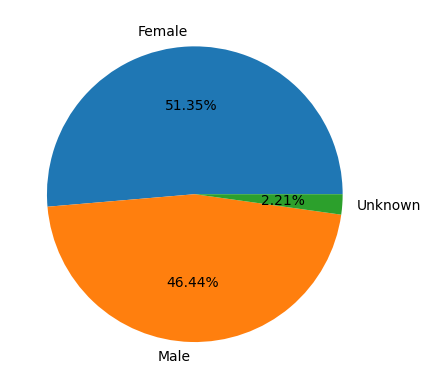

In [ ]:
# Types of Data:
# 1) Categorical Data: Textual Data e,g Gender, Smoking, Rank, LiveOnCampus, HowCommute
# Analysed: groupby()
# a) Pie Chart
# b) Histogram
# c) Donut Chart

# a) Pie Chart
data.groupby('Gender').size().plot(kind='pie', autopct = '%1.2f%%')

<Axes: ylabel='Frequency'>

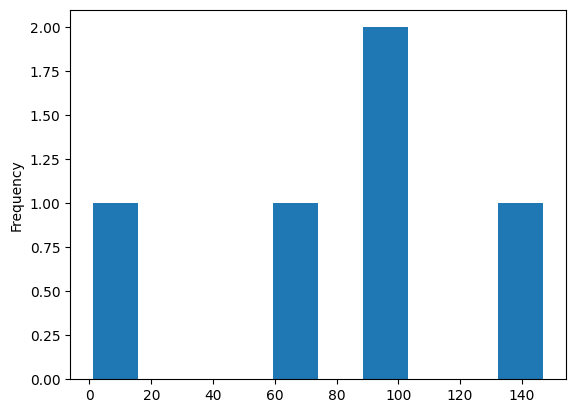

In [ ]:
# a) Pie Chart
data.groupby('Rank').size().plot(kind='hist')

In [ ]:
# Donut Chart: HowCommute Ratio
how_commute_ration = data.groupby('HowCommute').size()
# import matplotlib library
import matplotlib.pyplot as plt

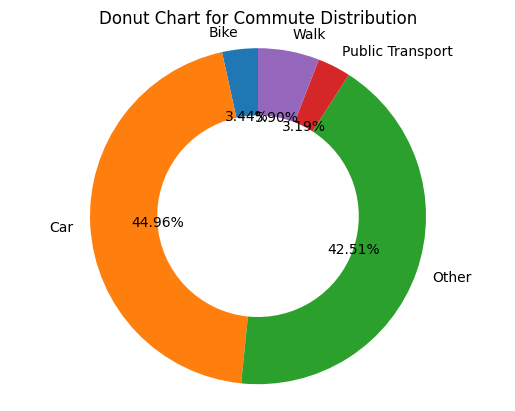

In [ ]:
# Create the subplots
fig, ax = plt.subplots()

ax.pie(how_commute_ration, labels = how_commute_ration.index, autopct= '%1.2f%%', startangle = 90, wedgeprops = dict(width=0.4))

ax.axis('equal')
plt.title('Donut Chart for Commute Distribution')

plt.show()

<Axes: xlabel='Gender', ylabel='Math'>

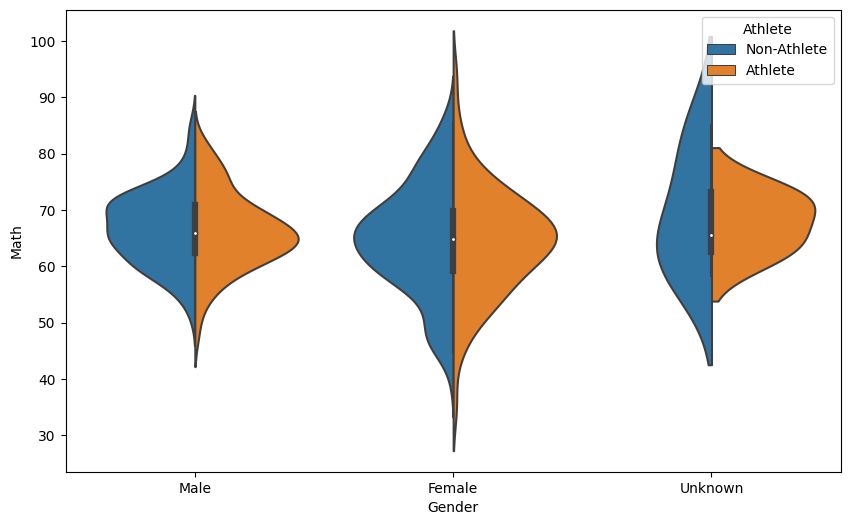

In [ ]:
# Categorical in Comparison with a Contionous Variable
# Math Distribution based on Gender and Athlete
# Violin Plot

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y = 'Math', data = data, hue='Athlete', split = True)


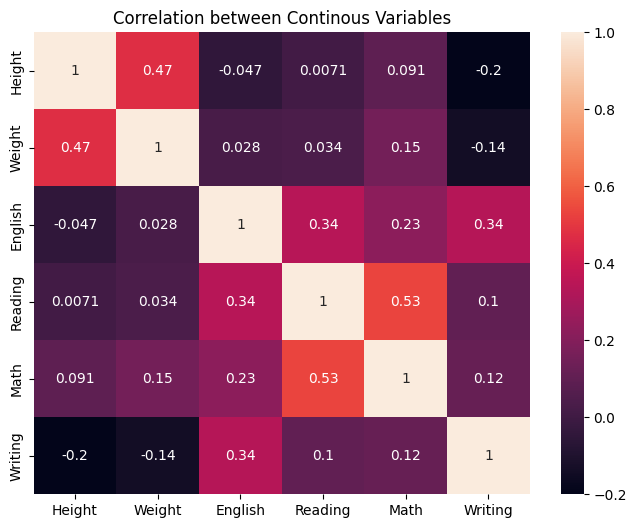

In [ ]:
# Continous Variables
# Numerical Variables
# Correlation Analysis: Relationship Between Contious Variable
# HeatMap

correlation_matrix = data[['Height', 'Weight', 'English', 'Reading', 'Math', 'Writing']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation between Continous Variables")
plt.show()

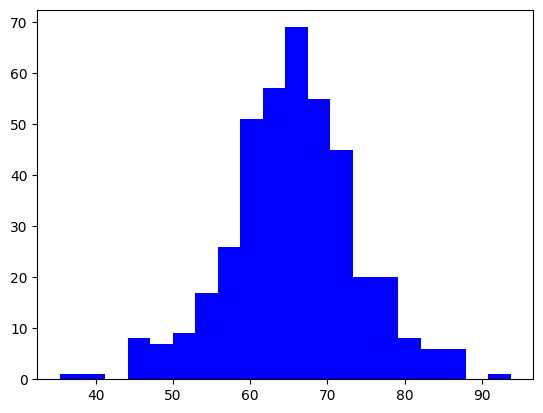

In [ ]:
# Histgram: Frequency of Distribution
plt.hist(data['Math'], bins = 20, color='blue')
plt.show()

<Axes: xlabel='Reading', ylabel='Writing'>

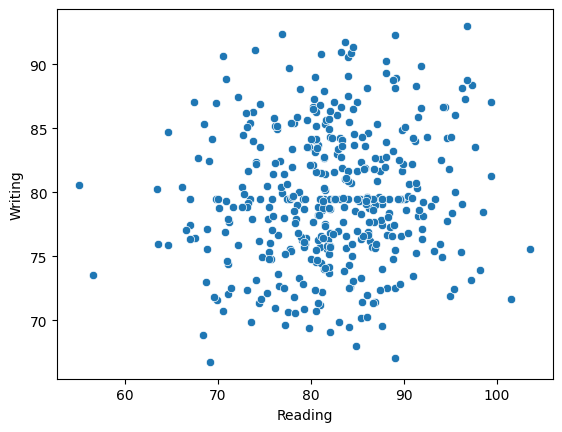

In [ ]:
# Scatter Plots
# Relation between 2 continous variables
# Linear Regression
# Machine Learning
# Height, Weight
sns.scatterplot(x=data['Reading'], y = data['Writing'], data = data)



Text(0.5, 1.0, 'Enrollment Over Time')

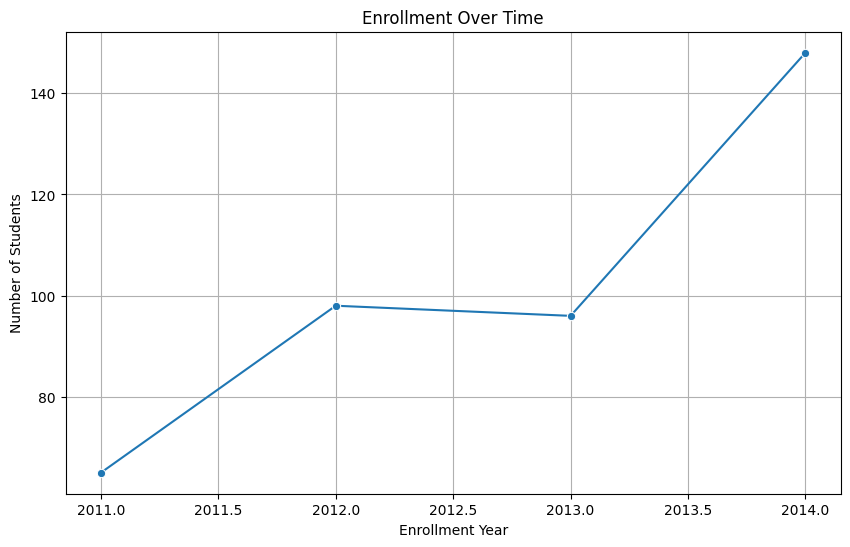

In [ ]:
# Time Series Visual
# 3D

# Enrollments Per Year
data['Year'] = data['enrolldate'].dt.year
enroll_per_year = data.groupby('Year').size().reset_index(name='Count')
enroll_per_year
plt.figure(figsize=(10,6))

sns.lineplot(data=enroll_per_year,x='Year', y='Count', marker = 'o')
plt.grid(True)
plt.ylabel("Number of Students")
plt.xlabel("Enrollment Year")
plt.title("Enrollment Over Time")


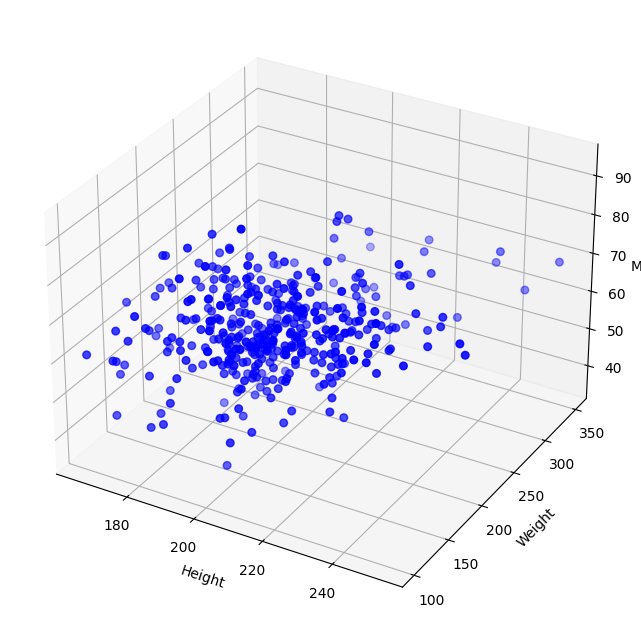

In [ ]:
# Relationship Between Height, Weight, Math 3D
x = data['Height']
y = data['Weight']
z = data['Math']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, c='b', marker='o', s = 30)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Math')
plt.show()


In [ ]:
# Diagnostic Analysis: Hypothesis Testing In Statistics
# Why